# 4.1 学习就是参数估计

In [1]:
import torch

## 4.1.1 一个热门的问题

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

## 4.1.4 从问题到PyTorch

In [3]:
def model(t_u, w, b):
    return w * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
w = torch.ones(1)
b = torch.zeros(1)
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

## 4.1.5 沿梯度向下

In [7]:
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [8]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [9]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

## 4.1.6 进行分析

In [10]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [11]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c)
    return dsq_diffs

In [12]:
def model(t_u, w, b):
    return w * t_u + b

In [13]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [14]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
    dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])

## 4.1.7 训练循环

In [15]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params = True, verbose=1):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        
        t_p = model(t_u, w, b) # 前向传播
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) # 反向传播
        
        params = params - learning_rate * grad
        
        if epoch % verbose == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params: ', params)
                print('    Grad  : ', grad)
    return params

In [16]:
training_loop(
            n_epochs = 10,
            learning_rate = 1e-2,
            params = torch.tensor([1.0, 0.0]),
            t_u = t_u,
            t_c = t_c)

Epoch 1, Loss 1763.884644
    Params:  tensor([-44.1730,  -0.8260])
    Grad  :  tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
    Params:  tensor([2568.4011,   45.1637])
    Grad  :  tensor([-261257.4062,   -4598.9707])
Epoch 3, Loss 19408031744.000000
    Params:  tensor([-148527.7344,   -2616.3933])
    Grad  :  tensor([15109615.0000,   266155.7188])
Epoch 4, Loss 64915909902336.000000
    Params:  tensor([8589997.0000,  151310.8750])
    Grad  :  tensor([-8.7385e+08, -1.5393e+07])
Epoch 5, Loss 217130439561707520.000000
    Params:  tensor([-4.9680e+08, -8.7510e+06])
    Grad  :  tensor([5.0539e+10, 8.9023e+08])
Epoch 6, Loss 726257020202974707712.000000
    Params:  tensor([2.8732e+10, 5.0610e+08])
    Grad  :  tensor([-2.9229e+12, -5.1486e+10])
Epoch 7, Loss 2429181687085405986357248.000000
    Params:  tensor([-1.6617e+12, -2.9270e+10])
    Grad  :  tensor([1.6904e+14, 2.9776e+12])
Epoch 8, Loss 8125117236949438203699396608.000000
    Params:  tensor([9.6102e+13, 1

tensor([3.2144e+17, 5.6621e+15])

In [17]:
training_loop(
            n_epochs = 10,
            learning_rate = 1e-4,
            params = torch.tensor([1.0, 0.0]),
            t_u = t_u,
            t_c = t_c)

Epoch 1, Loss 1763.884644
    Params:  tensor([ 0.5483, -0.0083])
    Grad  :  tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090546
    Params:  tensor([ 0.3623, -0.0118])
    Grad  :  tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params:  tensor([ 0.2858, -0.0135])
    Grad  :  tensor([765.4666,  16.5122])
Epoch 4, Loss 37.552845
    Params:  tensor([ 0.2543, -0.0143])
    Grad  :  tensor([315.0790,   8.5787])
Epoch 5, Loss 30.540285
    Params:  tensor([ 0.2413, -0.0149])
    Grad  :  tensor([129.6733,   5.3127])
Epoch 6, Loss 29.351152
    Params:  tensor([ 0.2360, -0.0153])
    Grad  :  tensor([53.3496,  3.9682])
Epoch 7, Loss 29.148882
    Params:  tensor([ 0.2338, -0.0156])
    Grad  :  tensor([21.9304,  3.4148])
Epoch 8, Loss 29.113848
    Params:  tensor([ 0.2329, -0.0159])
    Grad  :  tensor([8.9964, 3.1869])
Epoch 9, Loss 29.107145
    Params:  tensor([ 0.2325, -0.0162])
    Grad  :  tensor([3.6721, 3.0930])
Epoch 10, Loss 29.105242
    Params:  tensor([ 0.23

tensor([ 0.2324, -0.0166])

In [18]:
t_un = 0.1 * t_u

In [19]:
training_loop(
    n_epochs = 10,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un, # 规范化后的输入
    t_c = t_c)

Epoch 1, Loss 80.364342
    Params:  tensor([1.7761, 0.1064])
    Grad  :  tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574917
    Params:  tensor([2.0848, 0.1303])
    Grad  :  tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params:  tensor([2.2094, 0.1217])
    Grad  :  tensor([-12.4631,   0.8587])
Epoch 4, Loss 29.756193
    Params:  tensor([2.2616, 0.1004])
    Grad  :  tensor([-5.2218,  2.1327])
Epoch 5, Loss 29.507149
    Params:  tensor([2.2853, 0.0740])
    Grad  :  tensor([-2.3715,  2.6310])
Epoch 6, Loss 29.392458
    Params:  tensor([2.2978, 0.0458])
    Grad  :  tensor([-1.2492,  2.8241])
Epoch 7, Loss 29.298828
    Params:  tensor([2.3059, 0.0168])
    Grad  :  tensor([-0.8071,  2.8970])
Epoch 8, Loss 29.208717
    Params:  tensor([ 2.3122, -0.0124])
    Grad  :  tensor([-0.6325,  2.9227])
Epoch 9, Loss 29.119417
    Params:  tensor([ 2.3178, -0.0417])
    Grad  :  tensor([-0.5633,  2.9298])
Epoch 10, Loss 29.030487
    Params:  tensor([ 2.3232, -0.0710])
    Gra

tensor([ 2.3232, -0.0710])

In [20]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c,
    print_params = False,
    verbose=500)
params

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927831
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012])

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params) # 记住你是在规范后数据上训练的

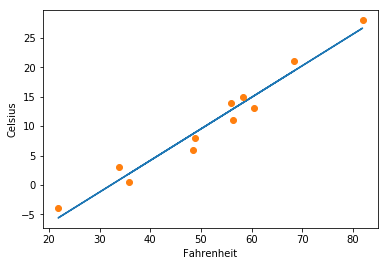

In [22]:
fig = plt.figure()
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")

plt.plot(t_u.numpy(), t_p.detach().numpy()) # 在原数据上作图
plt.plot(t_u.numpy(), t_c.numpy(), 'o')